# Laboratorio 2: Armado de un esquema de aprendizaje automático
En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en ./data/loan_data.csv. Si abren el archivo verán que al principio (las líneas que empiezan con #) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por scikit-learn.

In [ ]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(42)

## Carga de datos y división en entrenamiento y evaluación
La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

### Ejercicio 1: Descripción de los Datos y la Tarea
Responder las siguientes preguntas:

* ¿De qué se trata el conjunto de datos?
* ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
* ¿Qué información (atributos) hay disponible para hacer la predicción?
* ¿Qué atributos imagina ud. que son los más determinantes para la predicción?
* No hace falta escribir código para responder estas preguntas.

#### **Respuesta**
* Es un conjunto de datos relacionados a usuarios para la aprobacion de lineas de credito con garantia hipotecaria. La recopilacion se dio de resultados de sujetos que previamente pasaron por este proceso de forma manual.
* Crear un modelo predictivo solido que permita decidir si el sujeto con intencion al credito se le debe dar o no.
* Atributos:
  * **Label** Objetivo:
    * 1 el cliente incumplio el prestamos
    * 0 prestamos reembolsado
  * **LOAN**: Monto solicitado
  * **MORTURE**: Monto audedado de la hipoteca existente
  * **VALUE**: Valor de la propiedad actual
  * **YOJ**: Anios en el trabajo actual
  * **DEREGOJ**: Número de informes despectivos importantes
  * **DELINQ**: Número de líneas de crédito morosas
  * **CLAGE**: Antigüedad de la línea comercial más antigua en meses
  * **NINQ** Número de líneas de crédito recientes
  * **CLNO** Número de líneas de crédito
  * **DEBTINC** Relación deuda-ingresos 
* La LABEL, DEBTINC, VALUE serian las variables mas importantes que no deberian de faltar en el analisis.

### Ejercicio 2: Predicción con Modelos Lineales
En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:

* https://scikit-learn.org/stable/modules/sgd.html
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

#### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto
Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente fijar la semilla aleatoria para hacer repetible el experimento.

Evaluar sobre el conjunto de entrenamiento y sobre el conjunto de evaluación, reportando:

* Accuracy
* Precision
* Recall
* F1
* matriz de confusión

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

clf = SGDClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       313
           1       0.00      0.00      0.00        58

    accuracy                           0.84       371
   macro avg       0.42      0.50      0.46       371
weighted avg       0.71      0.84      0.77       371



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


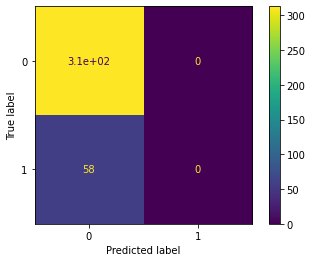

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

#### Ejercicio 2.2: Ajuste de Hiperparámetros
Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de entrenamiento y sobre el conjunto de evaluación, reportando:

* Accuracy
* Precision
* Recall
* F1
* matriz de confusión
* Documentación:


* https://scikit-learn.org/stable/modules/grid_search.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
param_grid = {
    'loss':  ["hinge", "log", "squared_hinge", "perceptron"],
    "early_stopping": [ True, False],
    "alpha": [0.005, 0.0001, 0.0005, 0.0001, 0.00005],
    "epsilon": [0.5, 0.2, 0.15, 0.1, 0.05, 0.001]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(SGDClassifier(), param_grid,scoring='accuracy', cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.005, 0.0001, 0.0005, 0.0001, 5e-05],
                         'early_stopping': [True, False],
                         'epsilon': [0.5, 0.2, 0.15, 0.1, 0.05, 0.001],
     

In [ ]:
results = clf.cv_results_
import pandas as pd
df = pd.DataFrame(results)
val = df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')[:5]
val

,params,mean_test_score,std_test_score,rank_test_score
193,"{'alpha': 5e-05, 'early_stopping': True, 'epsi...",0.831424,0.000792,1
159,"{'alpha': 0.0001, 'early_stopping': True, 'eps...",0.831424,0.000792,1
120,"{'alpha': 0.0005, 'early_stopping': False, 'ep...",0.831422,0.001044,3
147,"{'alpha': 0.0001, 'early_stopping': True, 'eps...",0.831422,0.001044,3
57,"{'alpha': 0.0001, 'early_stopping': True, 'eps...",0.830749,0.000884,5


In [ ]:
from operator import itemgetter

for i in range(3):
  alpha, epsilon, loss, early_stopping = itemgetter('alpha','epsilon','loss', "early_stopping")(val.params.iloc[i])
  print("CASE :: ",i,"alpha:", alpha,"\t epsilo:", epsilon, "\t loss:", loss, "\t early_stopping", early_stopping)

  clf_best = SGDClassifier(alpha=alpha, epsilon=epsilon, loss=loss, early_stopping=early_stopping)
  clf_best.fit(X_train, y_train)
  y_pred = clf_best.predict(X_test)
  print(classification_report(y_test, y_pred))
  print("\n")

CASE ::  0 alpha: 5e-05 	 epsilo: 0.5 	 loss: log 	 early_stopping True
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       313
           1       0.05      0.02      0.03        58

    accuracy                           0.79       371
   macro avg       0.44      0.48      0.45       371
weighted avg       0.71      0.79      0.75       371



CASE ::  1 alpha: 0.0001 	 epsilo: 0.1 	 loss: perceptron 	 early_stopping True
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       313
           1       0.00      0.00      0.00        58

    accuracy                           0.84       371
   macro avg       0.42      0.50      0.46       371
weighted avg       0.71      0.84      0.77       371



CASE ::  2 alpha: 0.0005 	 epsilo: 0.5 	 loss: hinge 	 early_stopping False
              precision    recall  f1-score   support

           0       0.85      0.58      0.69       313
     

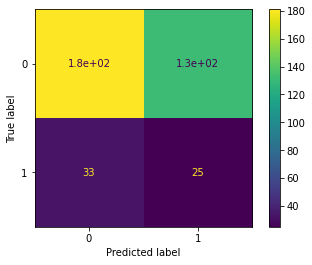

In [ ]:
plot_confusion_matrix(clf_best, X_test, y_test)

### Ejercicio 3: Árboles de Decisión
En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

**Documentación:**

* https://scikit-learn.org/stable/modules/tree.html
* https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

#### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto
Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente fijar la semilla aleatoria para hacer repetible el experimento.

Evaluar sobre el conjunto de entrenamiento y sobre el conjunto de evaluación, reportando:

* Accuracy
* Precision
* Recall
* F1
* matriz de confusión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       313
           1       0.64      0.62      0.63        58

    accuracy                           0.89       371
   macro avg       0.79      0.78      0.78       371
weighted avg       0.89      0.89      0.89       371



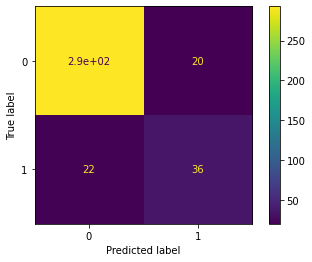

In [ ]:
plot_confusion_matrix(clf_tree, X_test, y_test)

#### Ejercicio 3.2: Ajuste de Hiperparámetros
Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de entrenamiento y sobre el conjunto de evaluación, reportando:

* Accuracy
* Precision
* Recall
* F1
* matriz de confusión


**Documentación:**
* https://scikit-learn.org/stable/modules/grid_search.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
param_grid = {
    'criterion':  ["gini", "entropy"],
    "splitter" : ["best", "random"],
    "max_depth": [3, 5, 8, 10, 15],
    "min_samples_leaf": [2,4,6,8,10]
}

In [ ]:
clf = GridSearchCV(DecisionTreeClassifier(), param_grid,scoring='accuracy', cv=3)
clf.fit(X_train, y_train)

results = clf.cv_results_
df = pd.DataFrame(results)
val = df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')[:5]
val

,params,mean_test_score,std_test_score,rank_test_score
20,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.878632,0.008621,1
41,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.875270,0.018442,2
26,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.875267,0.014861,3
24,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.875257,0.004931,4
28,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.874595,0.018272,5


In [ ]:
for i in range(3):
  criterion, splitter, max_depth, min_samples_leaf = itemgetter('criterion','splitter','max_depth', "min_samples_leaf")(val.params.iloc[i])
  
  print("CASE :: ",i,"criterion:", criterion,"\t splitter:", splitter, "\t max_depth:", max_depth, "\t min_samples_leaf", min_samples_leaf)

  clf_best = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  clf_best.fit(X_train, y_train)
  y_pred = clf_best.predict(X_test)
  print(classification_report(y_test, y_pred))
  print("\n")

CASE ::  0 criterion: gini 	 splitter: best 	 max_depth: 8 	 min_samples_leaf 2
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       313
           1       0.64      0.50      0.56        58

    accuracy                           0.88       371
   macro avg       0.78      0.72      0.75       371
weighted avg       0.87      0.88      0.87       371



CASE ::  1 criterion: gini 	 splitter: random 	 max_depth: 15 	 min_samples_leaf 2
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       313
           1       0.77      0.47      0.58        58

    accuracy                           0.89       371
   macro avg       0.84      0.72      0.76       371
weighted avg       0.89      0.89      0.88       371



CASE ::  2 criterion: gini 	 splitter: best 	 max_depth: 8 	 min_samples_leaf 8
              precision    recall  f1-score   support

           0       0.92      0.94      0.93 

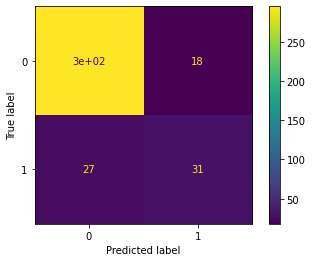

In [ ]:
plot_confusion_matrix(clf_best, X_test, y_test)